In [1]:
import geopandas as gpd
import json
import geojsonio
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass

### Try out Overpass API from python

In [4]:
nominatim = Nominatim()
areaId = nominatim.query('berlin friedrichshain kreuzberg').areaId()

[nominatim] downloading data: search


In [6]:
areaId

3600055764

In [13]:
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='body')
result = overpass.query(query)
result.countElements()

[overpass] downloading data: [timeout:25][out:json];area(3600055764)->.searchArea;(node["natural"="tree"](area.searchArea);); out body;


13429

In [22]:
result.generator()

'Overpass API 0.7.56.9 76e5016d'

In [25]:
result.isValid()

True

In [28]:
result.toJSON()["elements"][0]

[{'type': 'node',
  'id': 340280441,
  'lat': 52.4866309,
  'lon': 13.3847335,
  'tags': {'leaf_cycle': 'deciduous',
   'leaf_type': 'broadleaved',
   'natural': 'tree'}}]

### Read geojson files

In [292]:
parken_gesamt = pd.read_csv("../data/raw/friedrichshain-kreuzberg/parking_spaces_disabled_persons.csv", delimiter=";")

In [342]:
# parken_gesamt = gpd.read_file("data/raw/friedrichshain-kreuzberg/qgis-parking-data-with-database/parken_gesamt.geojson")
parken_gesamt = gpd.read_file("../data/raw/friedrichshain-kreuzberg/counted_parking-fk.geojson")

In [343]:
parken_gesamt.head()

,id,anzahl,elemid,elemname,elemtyp,klasse,klassennam,laenge,parkart,geometry
0,1,27.0,89056,Polylinie,1401,2,OE_KOSTENPF,64.5509,None,"MULTILINESTRING ((389990.378 5816959.153, 3900..."
1,2,NaN,89058,Polylinie,1401,7,OE_KEIN_ABSTELL,11.5184,None,"MULTILINESTRING ((390054.447 5816951.418, 3900..."
2,3,1.0,89060,Polylinie,1401,4,OE_NUTZER,12.1363,None,"MULTILINESTRING ((390065.884 5816950.076, 3900..."
3,4,47.0,89062,Polylinie,1401,2,OE_KOSTENPF,106.2872,None,"MULTILINESTRING ((390077.932 5816948.639, 3901..."
4,5,8.0,89065,Polylinie,1401,2,OE_KOSTENPF,39.0642,None,"MULTILINESTRING ((390182.398 5816889.845, 3901..."


In [337]:
# parken_gesamt.WEITERE_INFORMATIONEN

In [338]:
parken_gesamt_dict = json.loads(parken_gesamt.to_json())

In [339]:
parken_gesamt_dict["features"][:4]

[{'id': '0',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[389990.378, 5816959.153], [390054.447, 5816951.418]]]}},
 {'id': '1',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[390054.447, 5816951.418], [390065.884, 5816950.076]]]}},
 {'id': '2',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[390065.884, 5816950.076],
     [390077.93179768877, 5816948.639405683]]]}},
 {'id': '3',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'MultiLineString',
   'coordinates': [[[390077.93179768877, 5816948.639405683],
     [390183.444, 5816936.058]]]}}]

In [268]:
# geojsonio.display(parken_gesamt.to_json(), force_gist=False)
# embed(parken_gesamt.to_json())

<AxesSubplot:>

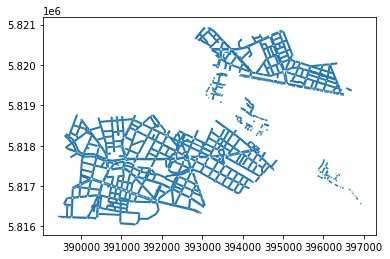

In [344]:
parken_gesamt.plot()

In [340]:
parken_gesamt.head()

,geometry
0,"MULTILINESTRING ((389990.378 5816959.153, 3900..."
1,"MULTILINESTRING ((390054.447 5816951.418, 3900..."
2,"MULTILINESTRING ((390065.884 5816950.076, 3900..."
3,"MULTILINESTRING ((390077.932 5816948.639, 3901..."
4,"MULTILINESTRING ((390182.398 5816889.845, 3901..."


In [306]:
coord = parken_gesamt.GPS_KOORDINATEN.str.split(",", expand=True).rename(columns={0: "latitude", 1: "longitude"})
parken_gesamt.geometry =  gpd.GeoSeries.from_xy(parken_gesamt.GPS_LON, parken_gesamt.GPS_LAT)
parken_gesamt = parken_gesamt.drop(columns=["GPS_KOORDINATEN", "GPS_LAT", "GPS_LON"])

In [281]:
# parken_gesamt.geometry = parken_gesamt.geometry.astype('object')
parken_gesamt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   BEHIPA_ID         114 non-null    object  
 1   BEZEICHNUNG       114 non-null    object  
 2   BEMERKUNG         114 non-null    object  
 3   ANZAHL            114 non-null    object  
 4   POLIZEI           114 non-null    object  
 5   STANDORT          114 non-null    object  
 6   PLZ               114 non-null    object  
 7   ORTSTEIL          114 non-null    object  
 8   GPS_LAT           114 non-null    object  
 9   GPS_LON           114 non-null    object  
 10  LETZTE_AENDERUNG  114 non-null    object  
 11  GPS_KOORDINATEN   114 non-null    object  
 12  KATEGORIE         114 non-null    object  
 13  LINK              114 non-null    object  
 14  geometry          0 non-null      geometry
dtypes: geometry(1), object(14)
memory usage: 13.5+ KB


In [330]:
json.dump(json_file, open("../data/raw/friedrichshain-kreuzberg/parking_spaces_disabled_persons.geojson", "w+"))

In [331]:
json_file = json.loads(parken_gesamt.to_json())


In [341]:
m = parken_gesamt.explore(tiles="CartoDB positron")
m
# ``["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor"
    # "CartoDB positron", “CartoDB dark_matter"]``

In [37]:
m.save("parken_map.html")

In [ ]:
import io
from PIL import Image

img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')